In [2]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import matplotlib.patches as mpatches
from scipy.stats import ranksums
from scipy.stats import ttest_1samp
from scipy.stats import median_abs_deviation
from scipy.io import savemat
import os

import sys
from help_funcs import *

import matplotlib
matplotlib.rcParams.update({'font.size': 18})

plotDataDir = 'compiled_data'
try: 
    os.mkdir(plotDataDir)
except FileExistsError:
    pass

sstcolor = (0.898,0.6314,0.0039)
pvcolor = (0.0, 0.4039, 0.7059)
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
import seaborn as sns

def get_slope(m,C,n,k):
    cvals = np.arange(0.02,0.33,0.01)
    yvals = naka_rushton(cvals, m, C, n, k)
    
    slopes = []
    for i in range(1, len(cvals)):
        slopes.append((yvals[i]-yvals[i-1])/0.01)
    maxslope = np.max(slopes)
    return maxslope, cvals[slopes.index(maxslope)]

		seed 1
varyDist_data/base_a0.08_pf0.8_pos0.3/results_1/
		seed 2
varyDist_data/base_a0.08_pf0.8_pos0.3/results_2/
		seed 3
varyDist_data/base_a0.08_pf0.8_pos0.3/results_3/
		seed 4
varyDist_data/base_a0.08_pf0.8_pos0.3/results_4/
		seed 5
varyDist_data/base_a0.08_pf0.8_pos0.3/results_5/
		seed 6
varyDist_data/base_a0.08_pf0.8_pos0.3/results_6/
		seed 7
varyDist_data/base_a0.08_pf0.8_pos0.3/results_7/
		seed 8
varyDist_data/base_a0.08_pf0.8_pos0.3/results_8/
		seed 9
varyDist_data/base_a0.08_pf0.8_pos0.3/results_9/
		seed 10
varyDist_data/base_a0.08_pf0.8_pos0.3/results_10/


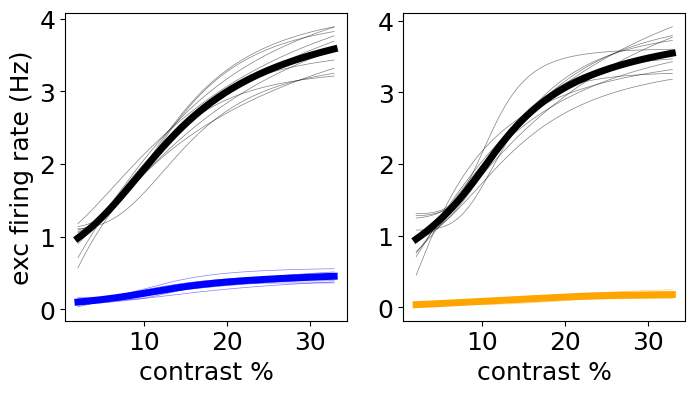

In [12]:
contrasts = np.array([0.02, 0.05, 0.1, 0.18, 0.33])
ignor=1
numseeds = 10
di=0
delay = 200
binlen = 200

ct = 'exc'
pi = 0 # index to get firing rates from exc cells
nr=6 # no. repeats
fig,axes = plt.subplots(1,2,figsize = (8,4))

pos = 0.3
alpha = 0.08
pfar = 0.8

cvals = np.arange(0.02,0.33,0.001)
num_cvals = len(cvals)

all_ctrl_pv_curves =np.zeros((numseeds,num_cvals))
all_stim_pv_curves =np.zeros((numseeds,num_cvals))
all_ctrl_sst_curves=np.zeros((numseeds,num_cvals))
all_stim_sst_curves=np.zeros((numseeds,num_cvals))
contrast_curves={}


simname = 'base_a%s'%alpha + '_pf%s'%pfar + '_pos%s'%pos
#         print(simname)
all_conditions = []
# for simname in ['alpha0.04_pfar0.1']:
slopes_cp, slopes_sp, slopes_cs, slopes_ss = [], [], [], []


ctrl_pv_ave = np.zeros(5)
stim_pv_ave = np.zeros(5)
ctrl_sst_ave = np.zeros(5)
stim_sst_ave = np.zeros(5)

ctrl_pv_ave_curve = np.zeros(num_cvals)
stim_pv_ave_curve = np.zeros(num_cvals)
ctrl_sst_ave_curve = np.zeros(num_cvals)
stim_sst_ave_curve = np.zeros(num_cvals)


for seed in range(1,numseeds+1):
    print(f'\t\tseed {seed}')
    # contrasts = np.array([0.02, 0.05, 0.2, 0.3])
    # contrasts = np.array([0.02,  0.2])
    ctrl_pv_curve = [[] for i in range(4)]
    stim_pv_curve = [[] for i in range(4)]
    ctrl_sst_curve = [[] for i in range(4)]
    stim_sst_curve = [[] for i in range(4)]

    ctrl_pv_curve_e = [[] for i in range(4)]
    stim_pv_curve_e = [[] for i in range(4)]
    ctrl_sst_curve_e = [[] for i in range(4)]
    stim_sst_curve_e = [[] for i in range(4)]


    folder = 'varyDist_data/%s/results_%s/'%(simname, seed)
    print(folder)
    not_all_found=False
    for cont in contrasts:
        try:
            with open(folder + 'PV_%s_spikes.pickle'%cont, 'rb') as f:
                all_spikes = pickle.load(f)
            with open(folder + 'PV_%s_positions.pickle'%cont, 'rb') as f:
                all_positions = pickle.load(f)
        except FileNotFoundError:
            print(simname, seed, 'PV', cont, 'not found.')
            not_all_found = True
            break

        ctrlpv_E_mean, stimpv_E_mean, ctrlpv_E_err, stimpv_E_err = getStimRateMeans(all_spikes[:8000], all_positions[:8000], delay=delay,binlen=binlen, nrepeats=nr)
        ctrlpv_P_mean, stimpv_P_mean, ctrlpv_P_err, stimpv_P_err = getStimRateMeans(all_spikes[8000:9000], all_positions[8000:9000], delay=delay, binlen=binlen, nrepeats=nr)
        ctrlpv_S_mean, stimpv_S_mean, ctrlpv_S_err, stimpv_S_err = getStimRateMeans(all_spikes[9000:10000], all_positions[9000:10000], delay=delay, binlen=binlen, nrepeats=nr)
        ctrlpv_A_mean, stimpv_A_mean, ctrlpv_A_err, stimpv_A_err = getStimRateMeans(all_spikes, all_positions, delay=delay, binlen=binlen, nrepeats=nr)

        ctrl_pv_curve[0].append(ctrlpv_E_mean)
        ctrl_pv_curve[1].append(ctrlpv_P_mean)
        ctrl_pv_curve[2].append(ctrlpv_S_mean)
        ctrl_pv_curve[3].append(ctrlpv_A_mean)
        ctrl_pv_curve_e[0].append(ctrlpv_E_err)
        ctrl_pv_curve_e[1].append(ctrlpv_P_err)
        ctrl_pv_curve_e[2].append(ctrlpv_S_err)
        ctrl_pv_curve_e[3].append(ctrlpv_A_err)

        stim_pv_curve[0].append(stimpv_E_mean)
        stim_pv_curve[1].append(stimpv_P_mean)
        stim_pv_curve[2].append(stimpv_S_mean)
        stim_pv_curve[3].append(stimpv_A_mean)
        stim_pv_curve_e[0].append(stimpv_E_err)
        stim_pv_curve_e[1].append(stimpv_P_err)
        stim_pv_curve_e[2].append(stimpv_S_err)
        stim_pv_curve_e[3].append(stimpv_A_err)


        try:
            with open(folder + 'SST_%s_spikes.pickle'%cont, 'rb') as f:
                all_spikes = pickle.load(f)
            with open(folder + 'SST_%s_positions.pickle'%cont, 'rb') as f:
                all_positions = pickle.load(f)
        except FileNotFoundError:
            print(simname, seed, 'SST', cont, 'not found.')
            not_all_found = True
            break

        ctrlsst_E_mean, stimsst_E_mean, ctrlsst_E_err, stimsst_E_err = getStimRateMeans(all_spikes[:8000], all_positions[:8000], delay=delay, binlen= binlen, nrepeats=nr)
        ctrlsst_P_mean, stimsst_P_mean, ctrlsst_P_err, stimsst_P_err = getStimRateMeans(all_spikes[8000:9000], all_positions[8000:9000], delay=delay, binlen= binlen, nrepeats=nr)
        ctrlsst_S_mean, stimsst_S_mean, ctrlsst_S_err, stimsst_S_err = getStimRateMeans(all_spikes[9000:10000], all_positions[9000:10000], delay=delay, binlen= binlen, nrepeats=nr)
        ctrlsst_A_mean, stimsst_A_mean, ctrlsst_A_err, stimsst_A_err = getStimRateMeans(all_spikes, all_positions, delay=delay, binlen= binlen, nrepeats=nr)


        ctrl_sst_curve[0].append(ctrlsst_E_mean)
        ctrl_sst_curve[1].append(ctrlsst_P_mean)
        ctrl_sst_curve[2].append(ctrlsst_S_mean)
        ctrl_sst_curve[3].append(ctrlsst_A_mean)
        ctrl_sst_curve_e[0].append(ctrlsst_E_err)
        ctrl_sst_curve_e[1].append(ctrlsst_P_err)
        ctrl_sst_curve_e[2].append(ctrlsst_S_err)
        ctrl_sst_curve_e[3].append(ctrlsst_A_err)

        stim_sst_curve[0].append(stimsst_E_mean)
        stim_sst_curve[1].append(stimsst_P_mean)
        stim_sst_curve[2].append(stimsst_S_mean)
        stim_sst_curve[3].append(stimsst_A_mean)
        stim_sst_curve_e[0].append(stimsst_E_err)
        stim_sst_curve_e[1].append(stimsst_P_err)
        stim_sst_curve_e[2].append(stimsst_S_err)
        stim_sst_curve_e[3].append(stimsst_A_err)
    # contrasts = np.array([ 0.05, 0.1, 0.2, 0.3])


        ctrl_pv_ave += ctrlpv_A_mean
        stim_pv_ave += stimpv_A_mean
        ctrl_sst_ave += ctrlsst_A_mean
        stim_sst_ave += stimsst_A_mean

    if not_all_found:
        continue

    condpv = True in (x == 0 for x in stim_pv_curve_e[pi][ignor:])
    condsst = True in (x == 0 for x in stim_sst_curve_e[pi][ignor:])

    params, cov = fit_naka_rushton(contrasts[ignor:], ctrl_pv_curve[pi][ignor:], sigma=ctrl_pv_curve_e[pi][ignor:])
    m_cp, C_cp, n_cp, k_cp = params
    m_cp_err, C_cp_err, n_cp_err, k_cp_err = np.sqrt(np.diag(cov))
#     slope_cp = C_cp*n_cp/k_cp/4.0
    slope_cp, _ = get_slope(m_cp, C_cp, n_cp, k_cp)

    if stim_pv_curve[pi][ignor:] == [0,0,0,0]:
        slope_sp = 0
        m_sp = 0
        C_sp = 0
        n_sp = 0
        k_sp = 0
    else:
        params, cov = fit_naka_rushton(contrasts[ignor:], stim_pv_curve[pi][ignor:], sigma=stim_pv_curve_e[pi][ignor:])
        m_sp, C_sp, n_sp, k_sp = params
        m_sp_err, C_sp_err, n_sp_err, k_sp_err = np.sqrt(np.diag(cov))
    #     slope_sp = C_sp*n_sp/k_sp/4.0
        slope_sp, _ = get_slope(m_sp, C_sp, n_sp, k_sp)

    params, cov = fit_naka_rushton(contrasts[ignor:], ctrl_sst_curve[pi][ignor:], sigma=ctrl_sst_curve_e[pi][ignor:])
    m_cs, C_cs, n_cs, k_cs = params
    m_cs_err, C_cs_err, n_cs_err, k_cs_err = np.sqrt(np.diag(cov))
#     slope_cs = C_cs*n_cs/k_cs/4.0
    slope_cs, _ = get_slope(m_cs, C_cs, n_cs, k_cs)

    if stim_sst_curve[pi][ignor:] == [0,0,0,0]:
        slope_ss = 0
        m_ss = 0
        C_ss = 0
        n_ss = 0
        k_ss = 0
    else:
#                 print(f'stim_sst_curve = {stim_sst_curve[pi][ignor:]}')
#                 print(f'stim_sst_curve_e = {stim_sst_curve_e[pi][ignor:]}')
        params, cov = fit_naka_rushton(contrasts[ignor:], stim_sst_curve[pi][ignor:], sigma=stim_sst_curve_e[pi][ignor:])
        m_ss, C_ss, n_ss, k_ss = params
        m_ss_err, C_ss_err, n_ss_err, k_ss_err = np.sqrt(np.diag(cov))
    #     slope_ss = C_ss*n_ss/k_ss/4.0
        slope_ss, _ = get_slope(m_ss, C_ss, n_ss, k_ss)


#     if np.max( [slope_cp, slope_sp, slope_cs, slope_ss] ) >50: continue
    slopes_cp.append(slope_cp)
    slopes_sp.append(slope_sp)
    slopes_cs.append(slope_cs)
    slopes_ss.append(slope_ss)

#             print(m_ss, C_ss, n_ss, k_ss)

#             print(slope_cp, slope_sp, slope_cs, slope_ss, np.max( [slope_cp, slope_sp, slope_cs, slope_ss] ) )

    scal = 1
    # scal = 50
#             cvals = np.arange(0.02,0.33,0.001)
#             fig,axes = plt.subplots(1,2,figsize = (8,4))
#             axes[0].scatter(contrasts*100, np.array(ctrl_pv_curve[pi])*scal, c='black')
#             axes[0].scatter(contrasts*100, np.array(stim_pv_curve[pi])*scal, c='blue')
    yvals = naka_rushton(cvals, m_cp, C_cp, n_cp, k_cp)

# all_ctrl_pv_curves =np.zeros((numseeds,num_cvals))
# all_stim_pv_curves =np.zeros((numseeds,num_cvals))
# all_ctrl_sst_curves=np.zeros((numseeds,num_cvals))
# all_stim_sst_curves=np.zeros((numseeds,num_cvals))
    all_ctrl_pv_curves[seed-1,:] = yvals*scal
#             print(yvals)
    ctrl_pv_ave_curve += yvals*scal
    
    
    axes[0].plot(cvals*100, yvals*scal, c='black',linewidth=0.5,alpha=0.5)
    if stim_pv_curve[pi][ignor:] == [0,0,0,0]:
        yvals = np.zeros(len(cvals))
    else:
        yvals = naka_rushton(cvals, m_sp, C_sp, n_sp, k_sp)
    
    stim_pv_ave_curve += yvals*scal
    all_stim_pv_curves[seed-1,:] = yvals*scal
    
    axes[0].plot(cvals*100, yvals*scal, c='blue',linewidth=0.5,alpha=0.5)

#             axes[1].scatter(contrasts*100, np.array(ctrl_sst_curve[pi])*scal, c='black')
#             axes[1].scatter(contrasts*100, np.array(stim_sst_curve[pi])*scal, c='orange')
    yvals = naka_rushton(cvals, m_cs, C_cs, n_cs, k_cs)
#             print(f'm_cs = {m_cs}')
    
    ctrl_sst_ave_curve += yvals*scal
    all_ctrl_sst_curves[seed-1,:] = yvals*scal
    
    axes[1].plot(cvals*100, yvals*scal, c='black',linewidth=0.5,alpha=0.5)
    if stim_sst_curve[pi][ignor:] == [0,0,0,0]:
        yvals = np.zeros(len(cvals))
    else:
        yvals = naka_rushton(cvals, m_ss, C_ss, n_ss, k_ss)
#             print(f'm_ss = {m_ss}')
    stim_sst_ave_curve += yvals*scal
    all_stim_sst_curves[seed-1,:] = yvals*scal
        
    axes[1].plot(cvals*100, yvals*scal, c='orange',linewidth=0.5,alpha=0.5)
    
contrast_curves['constrast_values'] = cvals*100
contrast_curves['all_ctrl_pv_curves'] = all_ctrl_pv_curves
contrast_curves['all_stim_pv_curves'] = all_stim_pv_curves
contrast_curves['all_ctrl_sst_curves'] = all_ctrl_sst_curves
contrast_curves['all_stim_sst_curves'] = all_stim_sst_curves
    
#         axes[0].set_ylim([0,65])
#         axes[1].set_ylim([0,65])
axes[0].set_ylabel(f'{ct} firing rate (Hz)',fontsize=18)
#         axes[1].set_xlabel('contrast \%')
axes[0].set_xlabel('contrast %',fontsize=18)
axes[1].set_xlabel('contrast %',fontsize=18)

ctrl_pv_ave_curve = ctrl_pv_ave_curve/numseeds
stim_pv_ave_curve = stim_pv_ave_curve/numseeds
ctrl_sst_ave_curve = ctrl_sst_ave_curve/numseeds
stim_sst_ave_curve = stim_sst_ave_curve/numseeds

axes[0].plot(cvals*100, ctrl_pv_ave_curve, c='black',linewidth=5)
axes[0].plot(cvals*100, stim_pv_ave_curve, c='blue',linewidth=5)
axes[1].plot(cvals*100, ctrl_sst_ave_curve, c='black',linewidth=5)
axes[1].plot(cvals*100, stim_sst_ave_curve, c='orange',linewidth=5)

contrast_curves['ave_ctrl_pv_curve'] = ctrl_pv_ave_curve
contrast_curves['ave_stim_pv_curve'] = stim_pv_ave_curve
contrast_curves['ave_ctrl_sst_curve'] = ctrl_sst_ave_curve
contrast_curves['ave_stim_sst_curve'] = stim_sst_ave_curve

# plt.savefig(f'FigS24A_cc.svg',bbox_inches='tight',dpi=200)
plt.show()
plt.close()
    

ctrl_pv_ave = ctrl_pv_ave/100.
stim_pv_ave = stim_pv_ave/100.
ctrl_sst_ave = ctrl_sst_ave/100.
stim_sst_ave = stim_sst_ave/100.

all_slopes = [slopes_cp, slopes_sp, slopes_cs, slopes_ss]


all_conditions.append(all_slopes)
di =0
slopes_cp, slopes_sp, slopes_cs, slopes_ss = all_conditions[di]

PV_changes = []
for ii in range(len(slopes_cp)):
    PV_changes.append( (slopes_sp[ii]-slopes_cp[ii]) / (slopes_sp[ii]+slopes_cp[ii]) )

SST_changes = []
for ii in range(len(slopes_cs)):
    SST_changes.append( (slopes_ss[ii]-slopes_cs[ii]) / (slopes_ss[ii]+slopes_cs[ii])  )

PV_median = np.median(PV_changes)
PV_mad = median_abs_deviation(PV_changes)
SST_median = np.median(SST_changes)
SST_mad = median_abs_deviation(SST_changes)

In [22]:
posVec = np.round(np.linspace(0,0.5,11),2)
num_positions = len(posVec)
print(f'posVec = {posVec}')
distVec = [(0.5-x) for x in posVec]
print(f'distVec = {distVec}')
eucDists = [np.sqrt(2*x**2) for x in distVec]
print(f'eucDists = {eucDists}')





#############################################################################
contrasts = np.array([0.02, 0.05, 0.1, 0.18, 0.33])
ignor=1
numseeds = 10
di=0
delay = 200
binlen = 200

ct = 'exc'
pi = 0 # index to get firing rates from exc cells
nr=6 # no. repeats

alpha = 0.08
pfar = 0.8

cvals = np.arange(0.02,0.33,0.001)
num_cvals = len(cvals)

PV_MI_medians = np.zeros(num_positions)
SST_MI_medians = np.zeros(num_positions)
PV_MI_mads = np.zeros(num_positions)
SST_MI_mads = np.zeros(num_positions)

for posi in range(num_positions):
    pos = posVec[posi]
    print(f'pos = {pos}')

    all_ctrl_pv_curves =np.zeros((numseeds,num_cvals))
    all_stim_pv_curves =np.zeros((numseeds,num_cvals))
    all_ctrl_sst_curves=np.zeros((numseeds,num_cvals))
    all_stim_sst_curves=np.zeros((numseeds,num_cvals))


    simname = 'base_a%s'%alpha + '_pf%s'%pfar + '_pos%s'%pos
    all_conditions = []
    slopes_cp, slopes_sp, slopes_cs, slopes_ss = [], [], [], []

    ctrl_pv_ave = np.zeros(5)
    stim_pv_ave = np.zeros(5)
    ctrl_sst_ave = np.zeros(5)
    stim_sst_ave = np.zeros(5)

    ctrl_pv_ave_curve = np.zeros(num_cvals)
    stim_pv_ave_curve = np.zeros(num_cvals)
    ctrl_sst_ave_curve = np.zeros(num_cvals)
    stim_sst_ave_curve = np.zeros(num_cvals)


    for seed in range(1,numseeds+1):
        print(f'\tseed {seed}')
        ctrl_pv_curve = [[] for i in range(4)]
        stim_pv_curve = [[] for i in range(4)]
        ctrl_sst_curve = [[] for i in range(4)]
        stim_sst_curve = [[] for i in range(4)]

        ctrl_pv_curve_e = [[] for i in range(4)]
        stim_pv_curve_e = [[] for i in range(4)]
        ctrl_sst_curve_e = [[] for i in range(4)]
        stim_sst_curve_e = [[] for i in range(4)]


        folder = 'varyDist_data/%s/results_%s/'%(simname, seed)
        # print(folder)
        not_all_found=False
        for cont in contrasts:
            try:
                with open(folder + 'PV_%s_spikes.pickle'%cont, 'rb') as f:
                    all_spikes = pickle.load(f)
                with open(folder + 'PV_%s_positions.pickle'%cont, 'rb') as f:
                    all_positions = pickle.load(f)
            except FileNotFoundError:
                print(simname, seed, 'PV', cont, 'not found.')
                not_all_found = True
                break

            ctrlpv_E_mean, stimpv_E_mean, ctrlpv_E_err, stimpv_E_err = getStimRateMeans(all_spikes[:8000], all_positions[:8000], delay=delay,binlen=binlen, nrepeats=nr)
            ctrlpv_P_mean, stimpv_P_mean, ctrlpv_P_err, stimpv_P_err = getStimRateMeans(all_spikes[8000:9000], all_positions[8000:9000], delay=delay, binlen=binlen, nrepeats=nr)
            ctrlpv_S_mean, stimpv_S_mean, ctrlpv_S_err, stimpv_S_err = getStimRateMeans(all_spikes[9000:10000], all_positions[9000:10000], delay=delay, binlen=binlen, nrepeats=nr)
            ctrlpv_A_mean, stimpv_A_mean, ctrlpv_A_err, stimpv_A_err = getStimRateMeans(all_spikes, all_positions, delay=delay, binlen=binlen, nrepeats=nr)

            ctrl_pv_curve[0].append(ctrlpv_E_mean)
            ctrl_pv_curve[1].append(ctrlpv_P_mean)
            ctrl_pv_curve[2].append(ctrlpv_S_mean)
            ctrl_pv_curve[3].append(ctrlpv_A_mean)
            ctrl_pv_curve_e[0].append(ctrlpv_E_err)
            ctrl_pv_curve_e[1].append(ctrlpv_P_err)
            ctrl_pv_curve_e[2].append(ctrlpv_S_err)
            ctrl_pv_curve_e[3].append(ctrlpv_A_err)

            stim_pv_curve[0].append(stimpv_E_mean)
            stim_pv_curve[1].append(stimpv_P_mean)
            stim_pv_curve[2].append(stimpv_S_mean)
            stim_pv_curve[3].append(stimpv_A_mean)
            stim_pv_curve_e[0].append(stimpv_E_err)
            stim_pv_curve_e[1].append(stimpv_P_err)
            stim_pv_curve_e[2].append(stimpv_S_err)
            stim_pv_curve_e[3].append(stimpv_A_err)


            try:
                with open(folder + 'SST_%s_spikes.pickle'%cont, 'rb') as f:
                    all_spikes = pickle.load(f)
                with open(folder + 'SST_%s_positions.pickle'%cont, 'rb') as f:
                    all_positions = pickle.load(f)
            except FileNotFoundError:
                print(simname, seed, 'SST', cont, 'not found.')
                not_all_found = True
                break

            ctrlsst_E_mean, stimsst_E_mean, ctrlsst_E_err, stimsst_E_err = getStimRateMeans(all_spikes[:8000], all_positions[:8000], delay=delay, binlen= binlen, nrepeats=nr)
            ctrlsst_P_mean, stimsst_P_mean, ctrlsst_P_err, stimsst_P_err = getStimRateMeans(all_spikes[8000:9000], all_positions[8000:9000], delay=delay, binlen= binlen, nrepeats=nr)
            ctrlsst_S_mean, stimsst_S_mean, ctrlsst_S_err, stimsst_S_err = getStimRateMeans(all_spikes[9000:10000], all_positions[9000:10000], delay=delay, binlen= binlen, nrepeats=nr)
            ctrlsst_A_mean, stimsst_A_mean, ctrlsst_A_err, stimsst_A_err = getStimRateMeans(all_spikes, all_positions, delay=delay, binlen= binlen, nrepeats=nr)


            ctrl_sst_curve[0].append(ctrlsst_E_mean)
            ctrl_sst_curve[1].append(ctrlsst_P_mean)
            ctrl_sst_curve[2].append(ctrlsst_S_mean)
            ctrl_sst_curve[3].append(ctrlsst_A_mean)
            ctrl_sst_curve_e[0].append(ctrlsst_E_err)
            ctrl_sst_curve_e[1].append(ctrlsst_P_err)
            ctrl_sst_curve_e[2].append(ctrlsst_S_err)
            ctrl_sst_curve_e[3].append(ctrlsst_A_err)

            stim_sst_curve[0].append(stimsst_E_mean)
            stim_sst_curve[1].append(stimsst_P_mean)
            stim_sst_curve[2].append(stimsst_S_mean)
            stim_sst_curve[3].append(stimsst_A_mean)
            stim_sst_curve_e[0].append(stimsst_E_err)
            stim_sst_curve_e[1].append(stimsst_P_err)
            stim_sst_curve_e[2].append(stimsst_S_err)
            stim_sst_curve_e[3].append(stimsst_A_err)


            ctrl_pv_ave += ctrlpv_A_mean
            stim_pv_ave += stimpv_A_mean
            ctrl_sst_ave += ctrlsst_A_mean
            stim_sst_ave += stimsst_A_mean

        if not_all_found:
            continue

        condpv = True in (x == 0 for x in stim_pv_curve_e[pi][ignor:])
        condsst = True in (x == 0 for x in stim_sst_curve_e[pi][ignor:])

        params, cov = fit_naka_rushton(contrasts[ignor:], ctrl_pv_curve[pi][ignor:], sigma=ctrl_pv_curve_e[pi][ignor:])
        m_cp, C_cp, n_cp, k_cp = params
        m_cp_err, C_cp_err, n_cp_err, k_cp_err = np.sqrt(np.diag(cov))
        slope_cp, _ = get_slope(m_cp, C_cp, n_cp, k_cp)


        try:
            params, cov = fit_naka_rushton(contrasts[ignor:], stim_pv_curve[pi][ignor:], sigma=stim_pv_curve_e[pi][ignor:])
            m_sp, C_sp, n_sp, k_sp = params
            m_sp_err, C_sp_err, n_sp_err, k_sp_err = np.sqrt(np.diag(cov))
            slope_sp, _ = get_slope(m_sp, C_sp, n_sp, k_sp)
        except ValueError:
            slope_sp = 0
            m_sp = 0
            C_sp = 0
            n_sp = 0
            k_sp = 0

        params, cov = fit_naka_rushton(contrasts[ignor:], ctrl_sst_curve[pi][ignor:], sigma=ctrl_sst_curve_e[pi][ignor:])
        m_cs, C_cs, n_cs, k_cs = params
        m_cs_err, C_cs_err, n_cs_err, k_cs_err = np.sqrt(np.diag(cov))
        slope_cs, _ = get_slope(m_cs, C_cs, n_cs, k_cs)

        try:
            params, cov = fit_naka_rushton(contrasts[ignor:], stim_sst_curve[pi][ignor:], sigma=stim_sst_curve_e[pi][ignor:])
            m_ss, C_ss, n_ss, k_ss = params
            m_ss_err, C_ss_err, n_ss_err, k_ss_err = np.sqrt(np.diag(cov))
            slope_ss, _ = get_slope(m_ss, C_ss, n_ss, k_ss)
        except ValueError:
            slope_ss = 0
            m_ss = 0
            C_ss = 0
            n_ss = 0
            k_ss = 0

        # if stim_pv_curve[pi][ignor:] == [0,0,0,0]:
        #     slope_sp = 0
        #     m_sp = 0
        #     C_sp = 0
        #     n_sp = 0
        #     k_sp = 0
        # else:
        #     params, cov = fit_naka_rushton(contrasts[ignor:], stim_pv_curve[pi][ignor:], sigma=stim_pv_curve_e[pi][ignor:])
        #     m_sp, C_sp, n_sp, k_sp = params
        #     m_sp_err, C_sp_err, n_sp_err, k_sp_err = np.sqrt(np.diag(cov))
        #     slope_sp, _ = get_slope(m_sp, C_sp, n_sp, k_sp)

        # params, cov = fit_naka_rushton(contrasts[ignor:], ctrl_sst_curve[pi][ignor:], sigma=ctrl_sst_curve_e[pi][ignor:])
        # m_cs, C_cs, n_cs, k_cs = params
        # m_cs_err, C_cs_err, n_cs_err, k_cs_err = np.sqrt(np.diag(cov))
        # slope_cs, _ = get_slope(m_cs, C_cs, n_cs, k_cs)

        # if stim_sst_curve[pi][ignor:] == [0,0,0,0]:
            # slope_ss = 0
            # m_ss = 0
            # C_ss = 0
            # n_ss = 0
            # k_ss = 0
        # else:
        #     params, cov = fit_naka_rushton(contrasts[ignor:], stim_sst_curve[pi][ignor:], sigma=stim_sst_curve_e[pi][ignor:])
        #     m_ss, C_ss, n_ss, k_ss = params
        #     m_ss_err, C_ss_err, n_ss_err, k_ss_err = np.sqrt(np.diag(cov))
        #     slope_ss, _ = get_slope(m_ss, C_ss, n_ss, k_ss)


        slopes_cp.append(slope_cp)
        slopes_sp.append(slope_sp)
        slopes_cs.append(slope_cs)
        slopes_ss.append(slope_ss)


        scal = 1
        yvals = naka_rushton(cvals, m_cp, C_cp, n_cp, k_cp)

        all_ctrl_pv_curves[seed-1,:] = yvals*scal
        ctrl_pv_ave_curve += yvals*scal
        
        
        if stim_pv_curve[pi][ignor:] == [0,0,0,0]:
            yvals = np.zeros(len(cvals))
        else:
            yvals = naka_rushton(cvals, m_sp, C_sp, n_sp, k_sp)
        
        stim_pv_ave_curve += yvals*scal
        all_stim_pv_curves[seed-1,:] = yvals*scal

        yvals = naka_rushton(cvals, m_cs, C_cs, n_cs, k_cs)
        
        ctrl_sst_ave_curve += yvals*scal
        all_ctrl_sst_curves[seed-1,:] = yvals*scal
        
        if stim_sst_curve[pi][ignor:] == [0,0,0,0]:
            yvals = np.zeros(len(cvals))
        else:
            yvals = naka_rushton(cvals, m_ss, C_ss, n_ss, k_ss)
        stim_sst_ave_curve += yvals*scal
        all_stim_sst_curves[seed-1,:] = yvals*scal
            
        
    contrast_curves['constrast_values'] = cvals*100
    contrast_curves['all_ctrl_pv_curves'] = all_ctrl_pv_curves
    contrast_curves['all_stim_pv_curves'] = all_stim_pv_curves
    contrast_curves['all_ctrl_sst_curves'] = all_ctrl_sst_curves
    contrast_curves['all_stim_sst_curves'] = all_stim_sst_curves


    ctrl_pv_ave_curve = ctrl_pv_ave_curve/numseeds
    stim_pv_ave_curve = stim_pv_ave_curve/numseeds
    ctrl_sst_ave_curve = ctrl_sst_ave_curve/numseeds
    stim_sst_ave_curve = stim_sst_ave_curve/numseeds
        

    ctrl_pv_ave = ctrl_pv_ave/100.
    stim_pv_ave = stim_pv_ave/100.
    ctrl_sst_ave = ctrl_sst_ave/100.
    stim_sst_ave = stim_sst_ave/100.

    all_slopes = [slopes_cp, slopes_sp, slopes_cs, slopes_ss]


    all_conditions.append(all_slopes)
    di =0
    slopes_cp, slopes_sp, slopes_cs, slopes_ss = all_conditions[di]

    PV_changes = []
    for ii in range(len(slopes_cp)):
        PV_changes.append( (slopes_sp[ii]-slopes_cp[ii]) / (slopes_sp[ii]+slopes_cp[ii]) )

    SST_changes = []
    for ii in range(len(slopes_cs)):
        SST_changes.append( (slopes_ss[ii]-slopes_cs[ii]) / (slopes_ss[ii]+slopes_cs[ii])  )

    PV_median = np.median(PV_changes)
    PV_mad = median_abs_deviation(PV_changes)
    SST_median = np.median(SST_changes)
    SST_mad = median_abs_deviation(SST_changes)

    PV_MI_medians[posi] = PV_median
    PV_MI_mads[posi] = PV_mad
    SST_MI_medians[posi] = SST_median
    SST_MI_mads[posi] = SST_mad


posVec = [0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5 ]
distVec = [0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15000000000000002, 0.09999999999999998, 0.04999999999999999, 0.0]
eucDists = [0.7071067811865476, 0.6363961030678927, 0.5656854249492381, 0.49497474683058323, 0.4242640687119285, 0.3535533905932738, 0.28284271247461906, 0.21213203435596428, 0.14142135623730948, 0.07071067811865474, 0.0]
pos = 0.0
	seed 1


/storage/home/hcoda1/8/zmobille3/.conda/envs/trainsnn/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


	seed 2
	seed 3
	seed 4
	seed 5
	seed 6
	seed 7
	seed 8
	seed 9
	seed 10
pos = 0.05
	seed 1
	seed 2
	seed 3
	seed 4
	seed 5
	seed 6
	seed 7
	seed 8
	seed 9
	seed 10
pos = 0.1
	seed 1
	seed 2
	seed 3
	seed 4
	seed 5
	seed 6
	seed 7
	seed 8
	seed 9
	seed 10
pos = 0.15
	seed 1
	seed 2
	seed 3
	seed 4
	seed 5
	seed 6
	seed 7
	seed 8
	seed 9
	seed 10
pos = 0.2
	seed 1
	seed 2
	seed 3
	seed 4
	seed 5
	seed 6
	seed 7
	seed 8
	seed 9
	seed 10
pos = 0.25
	seed 1
	seed 2
	seed 3
	seed 4
	seed 5
	seed 6
	seed 7
	seed 8
	seed 9
	seed 10
pos = 0.3
	seed 1
	seed 2
	seed 3
	seed 4
	seed 5
	seed 6
	seed 7
	seed 8
	seed 9
	seed 10
pos = 0.35
	seed 1
	seed 2
	seed 3
	seed 4
	seed 5
	seed 6
	seed 7
	seed 8
	seed 9
	seed 10
pos = 0.4
	seed 1
	seed 2
	seed 3


/storage/home/hcoda1/8/zmobille3/.conda/envs/trainsnn/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:931: RuntimeWarning: divide by zero encountered in divide
  transform = 1.0 / sigma


	seed 4
	seed 5
	seed 6
	seed 7
	seed 8
	seed 9
	seed 10
pos = 0.45
	seed 1
	seed 2
	seed 3
	seed 4
	seed 5
	seed 6
	seed 7
	seed 8
	seed 9
	seed 10
pos = 0.5
	seed 1
	seed 2
	seed 3
	seed 4
	seed 5
	seed 6
	seed 7
	seed 8
	seed 9
	seed 10


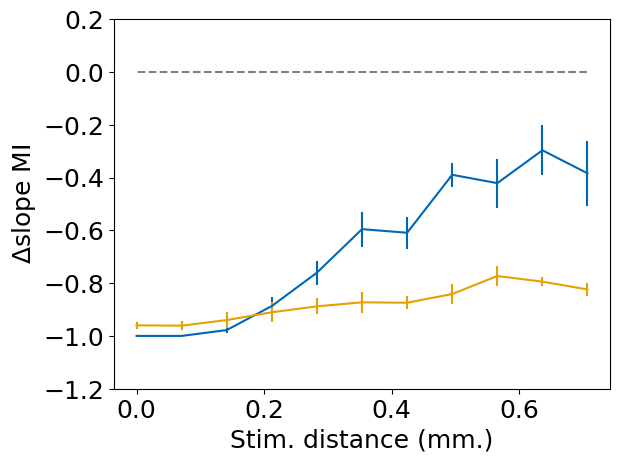

In [29]:
plt.errorbar(eucDists,PV_MI_medians,PV_MI_mads,color=pvcolor)
plt.errorbar(eucDists,SST_MI_medians,SST_MI_mads,color=sstcolor)
plt.ylim(-1.2,0.2)
plt.ylabel(r'$\Delta$slope MI')
plt.xlabel('Stim. distance (mm.)')
plt.hlines(0,eucDists[0],eucDists[-1],linestyle='--',color='gray')
plt.savefig('Fig_S22C.png',bbox_inches='tight',dpi=200)
plt.show()